In [2]:
import torch
from diffusers import AnimateDiffPipeline, DDIMScheduler, MotionAdapter
from diffusers.utils import export_to_video, export_to_gif
import os

# Load the motion adapter
adapter = MotionAdapter.from_pretrained("guoyww/animatediff-motion-adapter-v1-5-2", torch_dtype=torch.float16)
# load SD 1.5 based finetuned model
model_id = "SG161222/Realistic_Vision_V5.1_noVAE"
pipe = AnimateDiffPipeline.from_pretrained(model_id, motion_adapter=adapter, torch_dtype=torch.float16)
scheduler = DDIMScheduler.from_pretrained(
    model_id,
    subfolder="scheduler",
    clip_sample=False,
    timestep_spacing="linspace",
    beta_schedule="linear",
    steps_offset=1,
)
pipe.scheduler = scheduler

# enable memory savings
pipe.enable_vae_slicing()
pipe.enable_model_cpu_offload()

output = pipe(
    prompt=(
        "masterpiece, bestquality, highlydetailed, ultradetailed, sunset, "
        "orange sky, warm lighting, fishing boats, ocean waves seagulls, "
        "rippling water, wharf, silhouette, serene atmosphere, dusk, evening glow, "
        "golden hour, coastal landscape, seaside scenery"
    ),
    negative_prompt="bad quality, worse quality",
    num_frames=16,
    guidance_scale=7.5,
    num_inference_steps=25,
    generator=torch.Generator("cpu").manual_seed(42),
)
frames = output.frames[0]

output_path = "generated/01_t2v_sd15"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
export_to_video(frames, output_path+".mp4")
export_to_gif(frames, output_path+".gif")

The config attributes {'motion_activation_fn': 'geglu', 'motion_attention_bias': False, 'motion_cross_attention_dim': None} were passed to MotionAdapter, but are not expected and will be ignored. Please verify your config.json configuration file.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

The config attributes {'center_input_sample': False, 'flip_sin_to_cos': True, 'freq_shift': 0, 'mid_block_type': 'UNetMidBlock2DCrossAttn', 'only_cross_attention': False, 'attention_head_dim': 8, 'dual_cross_attention': False, 'class_embed_type': None, 'addition_embed_type': None, 'num_class_embeds': None, 'upcast_attention': False, 'resnet_time_scale_shift': 'default', 'resnet_skip_time_act': False, 'resnet_out_scale_factor': 1.0, 'time_embedding_type': 'positional', 'time_embedding_dim': None, 'time_embedding_act_fn': None, 'timestep_post_act': None, 'conv_in_kernel': 3, 'conv_out_kernel': 3, 'projection_class_embeddings_input_dim': None, 'class_embeddings_concat': False, 'mid_block_only_cross_attention': None, 'cross_attention_norm': None, 'addition_embed_type_num_heads': 64} were passed to UNetMotionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


  0%|          | 0/25 [00:00<?, ?it/s]

'generated/01_t2v_sd15.gif'

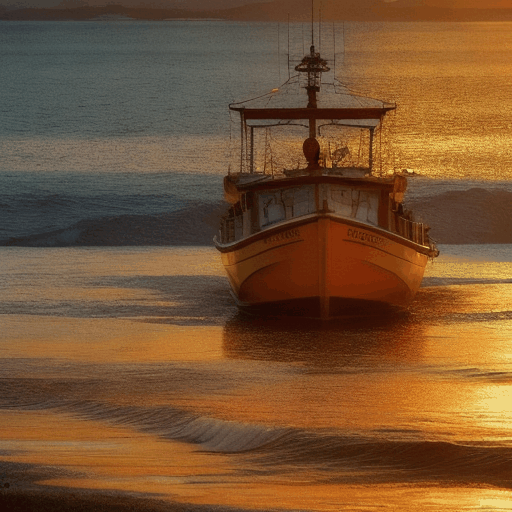

In [3]:
from IPython.display import Image

Image(output_path+".gif")